#Homework 6
Part 1 (3pt): Softmax

Part 2 (8pt): Bayes: MAP estimator for continuous data

Part 3 (9pt): Naive Bayes: Bayesian spam filter (discrete date)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Part 1
When computing the output probabilities from margins $x_1,\ x_2,\ \ldots,\ x_C$, often (incorrectly) called *logits*, the exponential terms may be very large or very small. This can cause numerical or overflow errors (try `np.exp(1000)`).

Check that the following formula is correct for an arbitrary $A$:

$$
Softmax_i = \frac{e^{x_i}}{\sum\limits_{c=1}^{C} e^{x_c}} = \frac{e^{x_i-A}}{\sum\limits_{c=1}^{C} e^{x_c-A}}.
$$

A suitable choice for this fixed value $A$ is
$$
A = \underset{c}{\max} x_c.
$$

##Q1 (3pt) Write a function `compute_probabilities` that computes Softmax.

In [8]:
def compute_probabilities(X):
    """
    Computes Softmax, for each vector X[i, :].

    Args:
        X - (n, C) NumPy array (n datapoints each with C features)
    Returns:
        H - (n, C) NumPy array, where each row H[i,:] = Softmax(X[i,:])
    """
    #YOUR CODE HERE
    A = np.max(X, axis=1)
    A = A.reshape(A.shape[0], 1)
    H = np.exp(X - A) / np.sum(np.exp(X - A), axis=1, keepdims=True)
    return H

In [15]:
#Test yourself
from scipy.special import softmax
M = np.random.randint(-1000, 1000, size=(30,20))
assert np.allclose(compute_probabilities(M), softmax(M, axis=1))

#Part 2
In this Question you will work with dataset from Ch.2 in *Classification, Parameter Estimation and State
Estimation: An Engineering Approach Using MATLAB* by
R. Duin, F. van der Heijden, D. de Ridder, and D. M.
J. Tax https://go.exlibris.link/Y6BQ8cJ5

In your solution, you should get similar desision boundaries as in the texbook:

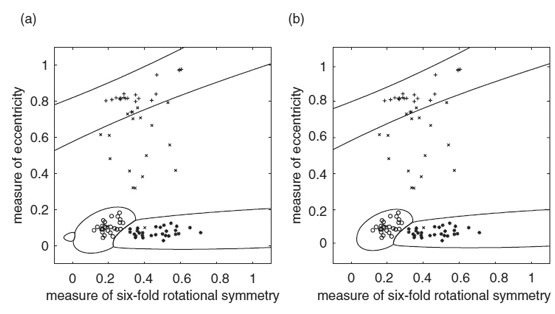

In [16]:
#data = pd.read_csv('data_bnrs.csv', header=None)
data = pd.read_csv('https://raw.githubusercontent.com/anton-selitskiy/RIT_ML/main/2023_fall/data_bnrs.csv', header=None)

In [17]:
data.head()

,0,1,2
0,0.35029,0.79978,1
1,0.60302,0.97778,1
2,0.32696,0.74125,1
3,0.35015,0.83668,1
4,0.46741,0.94682,1


In [18]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

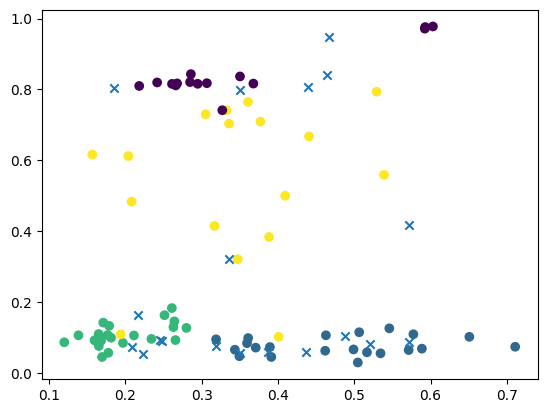

In [20]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], marker='x')

From the conditional probability formula, we know that
$$
p(y=c|x) = \frac{p(x, y=c)}{p(x)} = \frac{p(x|y=c)p(y=c)}{p(x)}, \quad c=1,2,3,4.
$$

Because the denominator doesn't depend on $c,$
$$
a(x) = \underset{c}{argmax}\ p(y=c|x) = \underset{c}{argmax}\ p(x|y=c)p(y=c).
$$

We will assume that conditional distribution $p(x|y=c)\sim N(\mu_c,\Sigma_c)$ you can use `multivariate_normal` from `scipy.stats` to calculate this value for the entier matix $X$ with datapoints in rows $X[i,:]$ as follows: `multivariate_normal(X, mean=, cov=)`.

For the Cost function, you can use the following decision rule:
$$
a(x) = argmin\ \text{Cost_Matrix}\cdot \begin{bmatrix}p(y=1|x)\\ p(y=2|x) \\ p(y=3|x)\\ p(y=4|x)\end{bmatrix} = argmin\ \text{Cost_Matrix}\cdot \begin{bmatrix}p(x|y=1)p(y=1)\\ p(x|y=2)p(y=2) \\ p(x|y=3)p(y=3)\\ p(x|y=4)p(y=4)\end{bmatrix}.
$$

##Q2 (8pt) Write the class `UserMAP` for maximum a posteriori estimator

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
class UserMAP():
    def __init__(self, cost=False):
        self.cost = cost

    def fit(self, X, y):
      """
      Calculate mean velues and covariance matrices for each class
      Calculate class distribution p(y)
      Store them as self. variables
      """
      pass

    def posterior(self, X):
      """
      Calculate posterior pobabilities and return argmax
      """
      pass

    def posterior_cost(self, X):
      """
      Given the cost matrix and posterior probabilities, predict the class
      """
      cost_matrix = np.array([
        [ -0.20, 0.07, 0.07, 0.07 ],
        [  0.07,-0.15, 0.07, 0.07 ],
        [  0.07, 0.07,-0.05, 0.07 ],
        [  0.03, 0.03, 0.03, 0.03 ]])
      pass


    def predict(self, X):
      if self.cost == True:
        return self.posterior_cost(X)
      return self.posterior(X)

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
clf = UserMAP()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
plot_decision_regions(X_test,y_test,clf)

In [ ]:
clf_cost = UserMAP(cost=True)

In [ ]:
clf_cost.fit(X_train, y_train)

In [ ]:
plot_decision_regions(X_test,y_test,clf_cost)

# Part 3
In this Question, you will apply Naive Bayes classifier to build a spam filter. Use dataset from https://www.kaggle.com/datasets/venky73/spam-mails-dataset?select=spam_ham_dataset.csv  It's *Enron email dataset,* a large collection of emails from the Enron Corporation.

In [ ]:
#!unzip spam_ham_dataset.csv.zip

Archive:  spam_ham_dataset.csv.zip
  inflating: spam_ham_dataset.csv    


In [ ]:
import pandas as pd
data = pd.read_csv('spam_ham_dataset.csv')

texts = data['text'].values
target = data['label_num'].values
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)

### Preprocessing and tokenization

### Solving it: bag of words

![img](http://www.novuslight.com/uploads/n/BagofWords.jpg)

Apply `CountVectorizer()` to the training data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()

In [ ]:
X_train_bow = vec.fit_transform(texts_train).toarray()
X_test_bow = vec.transform(texts_test).toarray()

Now you have the counts of the words from the bag of words in each e-mail.

__Naive bayes:__ perhaps the simplest model that can solve your problem is the so called Naive Bayes Classifier.
Its a simple probabilistic model that assumes the independence of input features and computes the counting probabilities.

If you don't remember the math behind Naive Bayes, read https://scikit-learn.org/stable/modules/naive_bayes.html to help refresh your memory. Done? Good! Now let's implement that :)

For every word we will calculate its frequency in spam and in ham, it will be $p(word|y=0)$ and $p(word|y=0)$. To avoid devisions by zero instead of the formula
$$
p(word|y) =\frac{\#word \text{ in class y}}{\text{total # words in class } y}
$$
use
$$
p(word|y) =\frac{\delta+\#word \text{ in class y}}{\delta\cdot\text{vocabulary length} + \text{total # words in class } y}
$$

##Q3 (9pt) Write the class for Naive Bayes

In [ ]:
delta = 1.0
class BinaryNaiveBayes:
#     delta = 1.0  # add this to all word counts to smoothe probabilities

    def fit(self, X, y):
        """
        Fit a NaiveBayes classifier for two classes
        :param X: [batch_size, vocab_size] of bag-of-words features
        :param y: [batch_size] of binary targets {0, 1}
        """
        # first, compute marginal probabilities of every class, p(y=c) for c = 0,1
        self.p_y = #(<YOUR CODE: probability of y=0 and of y=1 in this order>)


        # count occurences of each word in texts with label 1 and label 0 separately
        word_counts_positive = #<YOUR CODE HERE>
        word_counts_negative = #<YOUR CODE HERE>
        # ^-- both must be vectors of shape [vocab_size].

        # finally, lets use those counts to estimate p(x | y = c) for c = 0, 1

        #<YOUR CODE HERE>

        self.p_x_given_positive = #<...>

        self.p_x_given_negative = #<...>
        # both must be of shape [vocab_size]; and don't forget to add self.delta!

        return self

    def predict_scores(self, X):
        """
        :param X: [batch_size, vocab_size] of bag-of-words features
        :returns: a matrix of scores [batch_size, k] of scores for k-th class
        """
        # compute scores for positive and negative classes separately.
        # these scores should be proportional to log-probabilities of the respective target {0, 1}

        score_negative = X.dot(np.log(self.p_x_given_negative)) + np.log(self.p_y[0])
        score_positive = X.dot(np.log(self.p_x_given_positive)) + np.log(self.p_y[1])
        return np.stack([score_negative, score_positive], axis=-1)

    def predict(self, X):
        return self.predict_scores(X).argmax(axis=-1)

In [ ]:
naive_model = BinaryNaiveBayes().fit(X_train_bow, y_train)

In [ ]:
assert naive_model.p_y.shape == (2,) and naive_model.p_y.sum() == 1 and naive_model.p_y[0] > naive_model.p_y[1]
assert naive_model.p_x_given_positive.shape == naive_model.p_x_given_negative.shape == X_train_bow.shape[1:]
assert np.allclose(naive_model.p_x_given_positive.sum(), 1.0)
assert np.allclose(naive_model.p_x_given_negative.sum(), 1.0)
assert naive_model.p_x_given_negative.min() > 0, "did you forget to add delta?"

Model accuracy: 0.971
Well done!


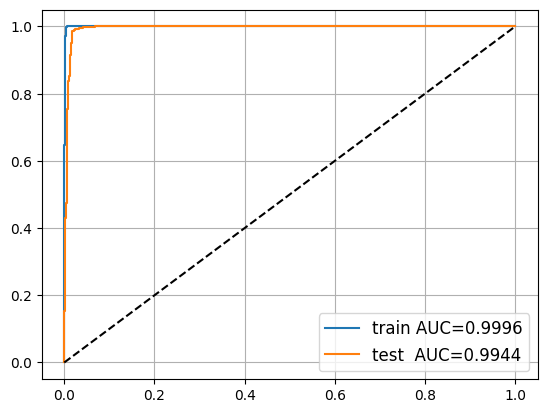

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, naive_model),
    ('test ', X_test_bow, y_test, naive_model)
]:
    proba = model.predict_scores(X)[:, 1] - model.predict_scores(X)[:, 0]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

test_accuracy = np.mean(naive_model.predict(X_test_bow) == y_test)
print(f"Model accuracy: {test_accuracy:.3f}")
assert test_accuracy > 0.75, "Accuracy too low. There's likely a mistake in the code."
print("Well done!")

Okay, it definitely learned *something*. Now let's figure out what exactly it learned. The simplest way to do that is by highlighting which words have a greatest ratio of positive to negative probability or vice versa. (The log of that fraction is called *logit.*) Here are top-25 words that have the __highest__ ratio of ${p(x_i | y=0)} \over {p(x_i | y=1)}$.

In [ ]:
bow_vocabulary = vec.get_feature_names_out()

In [ ]:
probability_ratio = 1/(naive_model.p_x_given_positive/naive_model.p_x_given_negative)
top_negative_words = bow_vocabulary[np.argsort(probability_ratio)[:25]]
assert len(top_negative_words) == 25 and [isinstance(w, str) for w in top_negative_words]

for i, word in enumerate(top_negative_words):
    print(f"#{i}\t{word.rjust(10, ' ')}\t(ratio={probability_ratio[list(bow_vocabulary).index(word)]})")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, naive_model.predict(X_test_bow))

Now, let's do it with the built-in function and compare results

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = #<YOUR CODE HERE - train a built-in Naive Bayes>

In [ ]:
np.mean(y_test==model.predict(X_test_bow))

Now lets try something less prehistoric: __Logistic Regression__. It turns out, if you're using silicon instead of an abacus, you can find model weights by optimizing the log-probability of the answer. Though, of course, you don't even need to write it by hand anymore. Let's sklearn it!

You can play with parameter $C=$ in LogisticRegression, it plays similar role as in SVM allowing slightly negative margins.

In [ ]:
from sklearn.linear_model import LogisticRegression
bow_model = #<YOUR CODE HERE - train a logistic regression>

Model accuracy: 0.971
Well done!


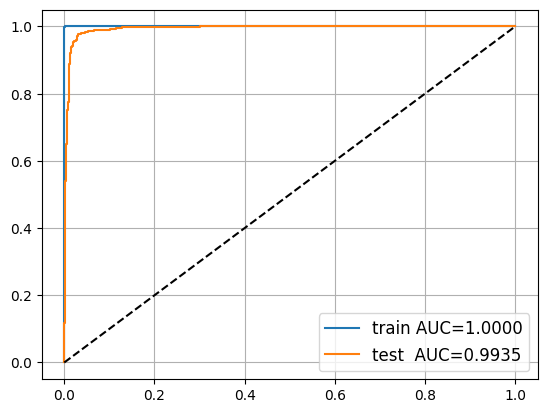

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

test_accuracy = np.mean(bow_model.predict(X_test_bow) == y_test)
print(f"Model accuracy: {test_accuracy:.3f}")
assert test_accuracy > 0.77, "Hint: tune the parameter C to improve performance"
print("Well done!")

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, bow_model.predict(X_test_bow))

Finally, you can play with threshold to reduce the False Positive predictions, as you did in HW5.
